In [ ]:
%load_ext autoreload
%autoreload 2
%cd ..
import numpy as np
import matplotlib.pyplot as plt
from src.ortools_solver import CVRP_solver
from src.utils import random_choose_candidate_2,show_matrix, get_optimized_sequence
from src.pipette_scheduler import calculate_D, calculate_S_E, calculate_D_prime,calculate_X
from pipette_scheduling.src.baseline_methods import row_wise_optimization, greedy_scheduling
import pandas as pd

/mnt/c/Users/runzh/OneDrive/Documents/2025/pipette_scheduling


/home/roger/miniforge3/envs/pipette_opt/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
/home/roger/miniforge3/envs/pipette_opt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


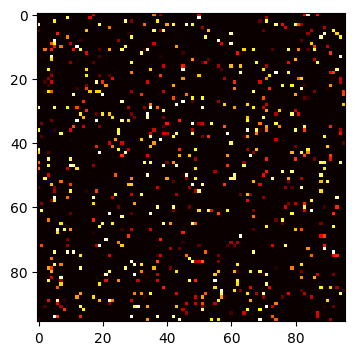

In [3]:
np.random.seed(0)
num_candidates = 700
a = random_choose_candidate_2(96,96,num_candidates)
jobs = np.argwhere(a)
show_matrix(a)

## Guangqi: Now you can use the following function for optimization

In [4]:
from src.pipette_scheduler import CVRP_pipette_scheduling
CVRP_pipette_scheduling(a, 2, 30, 1, 20)

(3030.47,
 array([[691, 693, 290, 173, 188, 197, 201, 203],
        [315, 329, 337, 598, 584, 593, 595, 583],
        [420, 427, 398, 407, 538, 114,  17,  30],
        [482, 484, 491, 498, 228,  98, 103, 107],
        [435, 441, 450, 172, 314, 320, 425, 327],
        [517, 481, 540, 546, 641, 647, 656, 662],
        [ 94,  96, 149, 158, 166,  56,  62,  73],
        [332, 339,  60,  71,  79, 183, 308, 312],
        [513, 524, 689, 698, 631, 670, 678, 681],
        [637, 651, 658, 671, 676, 680, 447, 458],
        [605, 616, 621, 630, 275,  41,  45, 463],
        [596,  31,  39,  47,  42, 344, 349, 355],
        [ 19, 250, 262, 267, 280, 297, 301, 494],
        [471, 478, 161, 170, 423, 430, 433, 438],
        [405, 412, 655, 663, 674, 682, 692, 700],
        [116, 542, 431, 100, 104, 106, 137, 142],
        [472, 483, 672,  78, 578,  59, 196, 202],
        [324, 258, 277, 286, 294, 456, 369, 373],
        [643, 654, 165, 169, 511, 619, 626, 318],
        [156, 164, 168,  57,  64, 144, 1

## If you need to debug:

In [7]:
task_matrix = a
nwells_source, nwells_destination = task_matrix.shape

D_S = calculate_D(nwells_source)
D_D = calculate_D(nwells_destination)

S, E, volumes = calculate_S_E(task_matrix)
D_prime = calculate_D_prime(D_S, D_D, S, E, volumes, 1, 100, 1, 100)

optimized_distance, recorder = CVRP_solver(np.round(D_prime* 100).astype(np.int64), solving_time=20)

print("VRP distance: ", optimized_distance / 100)

VRP distance:  1237.28


In [ ]:
vrp_sequence = get_optimized_sequence(recorder)
t = calculate_X(vrp_sequence)
VRP_distance = np.trace(np.dot(t.T, np.round(D_prime * 100))) / 100
print("VRP distance: ", VRP_distance)

VRP distance:  1237.28


In [25]:
# calculate the cost of the non-optimized sequence
tasks = np.array(range(jobs.shape[0]))
tasks = tasks+1
# if tasks.shape[0] %8 != 0, pad with -1
if tasks.shape[0] %8 != 0:
    tasks = np.pad(tasks, (0, 8-tasks.shape[0]%8), 'constant', constant_values=-1)
unoptimized_seuqnece = tasks.reshape(-1, 8)
t = calculate_T_test(unoptimized_seuqnece)
d = D_prime
non_optimized_distance = np.trace(np.dot(t.T, d))
# change non_optimized_distance to integer
non_optimized_distance = int(non_optimized_distance)
print(f'non_optimized_distance: {non_optimized_distance}')

non_optimized_distance: 1958


In [26]:
unoptimized_seuqnece

array([[  1,   2,   3,   4,   5,   6,   7,   8],
       [  9,  10,  11,  12,  13,  14,  15,  16],
       [ 17,  18,  19,  20,  21,  22,  23,  24],
       [ 25,  26,  27,  28,  29,  30,  31,  32],
       [ 33,  34,  35,  36,  37,  38,  39,  40],
       [ 41,  42,  43,  44,  45,  46,  47,  48],
       [ 49,  50,  51,  52,  53,  54,  55,  56],
       [ 57,  58,  59,  60,  61,  62,  63,  64],
       [ 65,  66,  67,  68,  69,  70,  71,  72],
       [ 73,  74,  75,  76,  77,  78,  79,  80],
       [ 81,  82,  83,  84,  85,  86,  87,  88],
       [ 89,  90,  91,  92,  93,  94,  95,  96],
       [ 97,  98,  99, 100, 101, 102, 103, 104],
       [105, 106, 107, 108, 109, 110, 111, 112],
       [113, 114, 115, 116, 117, 118, 119, 120],
       [121, 122, 123, 124, 125, 126, 127, 128],
       [129, 130, 131, 132, 133, 134, 135, 136],
       [137, 138, 139, 140, 141, 142, 143, 144],
       [145, 146, 147, 148, 149, 150, 151, 152],
       [153, 154, 155, 156, 157, 158, 159, 160],
       [161, 162, 16

In [ ]:
# calculate the cost of the row-wise optimized sequence
index_matrix = np.zeros((96,96))
for j in range(jobs.shape[0]):
    index_matrix[jobs[j, 0], jobs[j, 1]] = j+1
row_wise_optimized_sequence = row_wise_optimization(index_matrix)
if row_wise_optimized_sequence.shape[0] %8 != 0:
    row_wise_optimized_sequence = np.pad(row_wise_optimized_sequence, (0, 8-row_wise_optimized_sequence.shape[0]%8), 'constant', constant_values=-1)
row_wise_optimized_sequence = row_wise_optimized_sequence.reshape(-1, 8)
t = calculate_X(row_wise_optimized_sequence)
row_wise_optimized_distance = np.trace(np.dot(t.T, d))
# change non_optimized_distance to integer
row_wise_optimized_distance = int(row_wise_optimized_distance)
print(f'row_wise_optimized_distance: {row_wise_optimized_distance}')

row_wise_optimized_distance: 1475
